# Setup

In [1]:
import scanpy as sc
import scvi
import matplotlib.pyplot as plt
import warnings
import os
import pandas as pd
import anndata as ad
import seaborn as sns

Global seed set to 0


In [2]:
sc.set_figure_params(figsize=(4,4),  dpi=150, dpi_save=300, facecolor="white", frameon=False)
plt.rcParams["axes.grid"] = False
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
os.getcwd()

'/notebook/Joe/M-cells/code/epithelial_signature_processing'

# Data import

In [4]:
path = "/notebook/External/Archive/Joe/raw_data/Tissue_atlases/tabula_muris_10X_data/droplet/"
adataDict = {}
for dir in os.listdir(path):
    print(f"Importing sample: {dir}")
    data = sc.read_10x_mtx(path + dir, cache=True)
    data.obs.index = dir.split("-")[1] + "_" + data.obs.index
    adataDict[dir] = data

Importing sample: Bladder-10X_P4_3
Importing sample: Bladder-10X_P4_4
Importing sample: Bladder-10X_P7_7
Importing sample: Heart-10X_P7_4
Importing sample: Kidney-10X_P4_5
Importing sample: Kidney-10X_P4_6
Importing sample: Kidney-10X_P7_5
Importing sample: Liver-10X_P4_2
Importing sample: Liver-10X_P7_0
Importing sample: Liver-10X_P7_1
Importing sample: Lung-10X_P7_8
Importing sample: Lung-10X_P7_9
Importing sample: Lung-10X_P8_12
Importing sample: Lung-10X_P8_13
Importing sample: Mammary-10X_P7_12
Importing sample: Mammary-10X_P7_13
Importing sample: Marrow-10X_P7_2
Importing sample: Marrow-10X_P7_3
Importing sample: Muscle-10X_P7_14
Importing sample: Muscle-10X_P7_15
Importing sample: Spleen-10X_P4_7
Importing sample: Spleen-10X_P7_6
Importing sample: Thymus-10X_P7_11
Importing sample: Tongue-10X_P4_0
Importing sample: Tongue-10X_P4_1
Importing sample: Tongue-10X_P7_10
Importing sample: Trachea-10X_P8_14
Importing sample: Trachea-10X_P8_15


In [5]:
adata = ad.concat(adataDict, label="batch")
adata.obs.index = [i[0] for i in adata.obs.index.str.split("-")]

## Add annotations

In [6]:
metadata = pd.read_csv("/notebook/External/Archive/Joe/raw_data/Tissue_atlases/tabula_muris_10X_data/annotations_droplets.csv", index_col="cell")
adata = adata[metadata.index]
adata.obs = adata.obs.join(metadata)

In [7]:
adata.obs

,batch,tissue,cell_ontology_class,cell_ontology_term_iri,cell_ontology_id
10X_P4_3_AAAGTAGAGATGCCAG,Bladder-10X_P4_3,Bladder,mesenchymal cell,http://purl.obolibrary.org/obo/CL_0008019,CL:0008019
10X_P4_3_AACCGCGTCCAACCAA,Bladder-10X_P4_3,Bladder,mesenchymal cell,http://purl.obolibrary.org/obo/CL_0008019,CL:0008019
10X_P4_3_AACTCCCGTCGGGTCT,Bladder-10X_P4_3,Bladder,mesenchymal cell,http://purl.obolibrary.org/obo/CL_0008019,CL:0008019
10X_P4_3_AACTCTTAGTTGCAGG,Bladder-10X_P4_3,Bladder,bladder cell,http://purl.obolibrary.org/obo/CL_1001319,CL:1001319
10X_P4_3_AACTCTTTCATAACCG,Bladder-10X_P4_3,Bladder,mesenchymal cell,http://purl.obolibrary.org/obo/CL_0008019,CL:0008019
...,...,...,...,...,...
10X_P8_15_TTTGTCAGTTGTCGCG,Trachea-10X_P8_15,Trachea,endothelial cell,http://purl.obolibrary.org/obo/CL_0000115,CL:0000115
10X_P8_15_TTTGTCATCACGATGT,Trachea-10X_P8_15,Trachea,leukocyte,http://purl.obolibrary.org/obo/CL_0000738,CL:0000738
10X_P8_15_TTTGTCATCGGCTTGG,Trachea-10X_P8_15,Trachea,endothelial cell,http://purl.obolibrary.org/obo/CL_0000115,CL:0000115
10X_P8_15_TTTGTCATCTTACCGC,Trachea-10X_P8_15,Trachea,stromal cell,http://purl.obolibrary.org/obo/CL_0000499,CL:0000499


# Process data

In [8]:
# Helper method for plotting QC metrics for scrnaseq package
def qc_plot(adata, counts_thresh=30000, genes_thresh=5000, mt_thresh=10, show_thresh=True):
    sns.set_style("ticks")
    sns.set_context("paper")
    fig=plt.figure(figsize=(9,3))
    plt.subplot(1,3,1)
    sns.histplot(
        x=adata.obs.pct_counts_mt,
        hue=adata.obs.batch,
    )
    if show_thresh:
        plt.axvline(
            x=mt_thresh,
            ymin=0,
            ymax=1,
            color="black",
            linestyle="--",
        )

    plt.subplot(1,3,2)
    sns.scatterplot(
        x=adata.obs.total_counts,
        y=adata.obs.n_genes_by_counts,
        s=2,
        hue=adata.obs.batch,
        linewidth=0,
    )
    if show_thresh:
        plt.axvline(
            x=counts_thresh,
            ymin=0,
            ymax=1,
            color="black",
            linestyle="--",
        )
        plt.axhline(
            y=genes_thresh,
            xmin=0,
            xmax=1,
            color="black",
            linestyle="--",
        )
    plt.subplot(1,3,3)
    cell_data = pd.DataFrame()
    for category in adata.obs.batch.unique():
        category_data = adata[adata.obs.batch == category].obs.copy()
        category_data["rank"] = category_data.total_counts.rank(method="first", ascending=False,)
        cell_data = pd.concat([cell_data, category_data])
    cell_data = cell_data.sort_values(by="rank")
    sns.lineplot(
        x=cell_data["rank"],
        y=cell_data.total_counts,
        hue=cell_data.batch,
        hue_order=adata.obs.batch.unique(),
    )
    if show_thresh:
        plt.axhline(
            y=counts_thresh,
            xmin=0,
            xmax=1,
            color="black",
            linestyle="--",
        )
    fig.tight_layout()
    plt.show()

## Full Atlas

In [9]:
adata.layers["counts"] = adata.X.copy()
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata

/tmp/ipykernel_290/3908909464.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


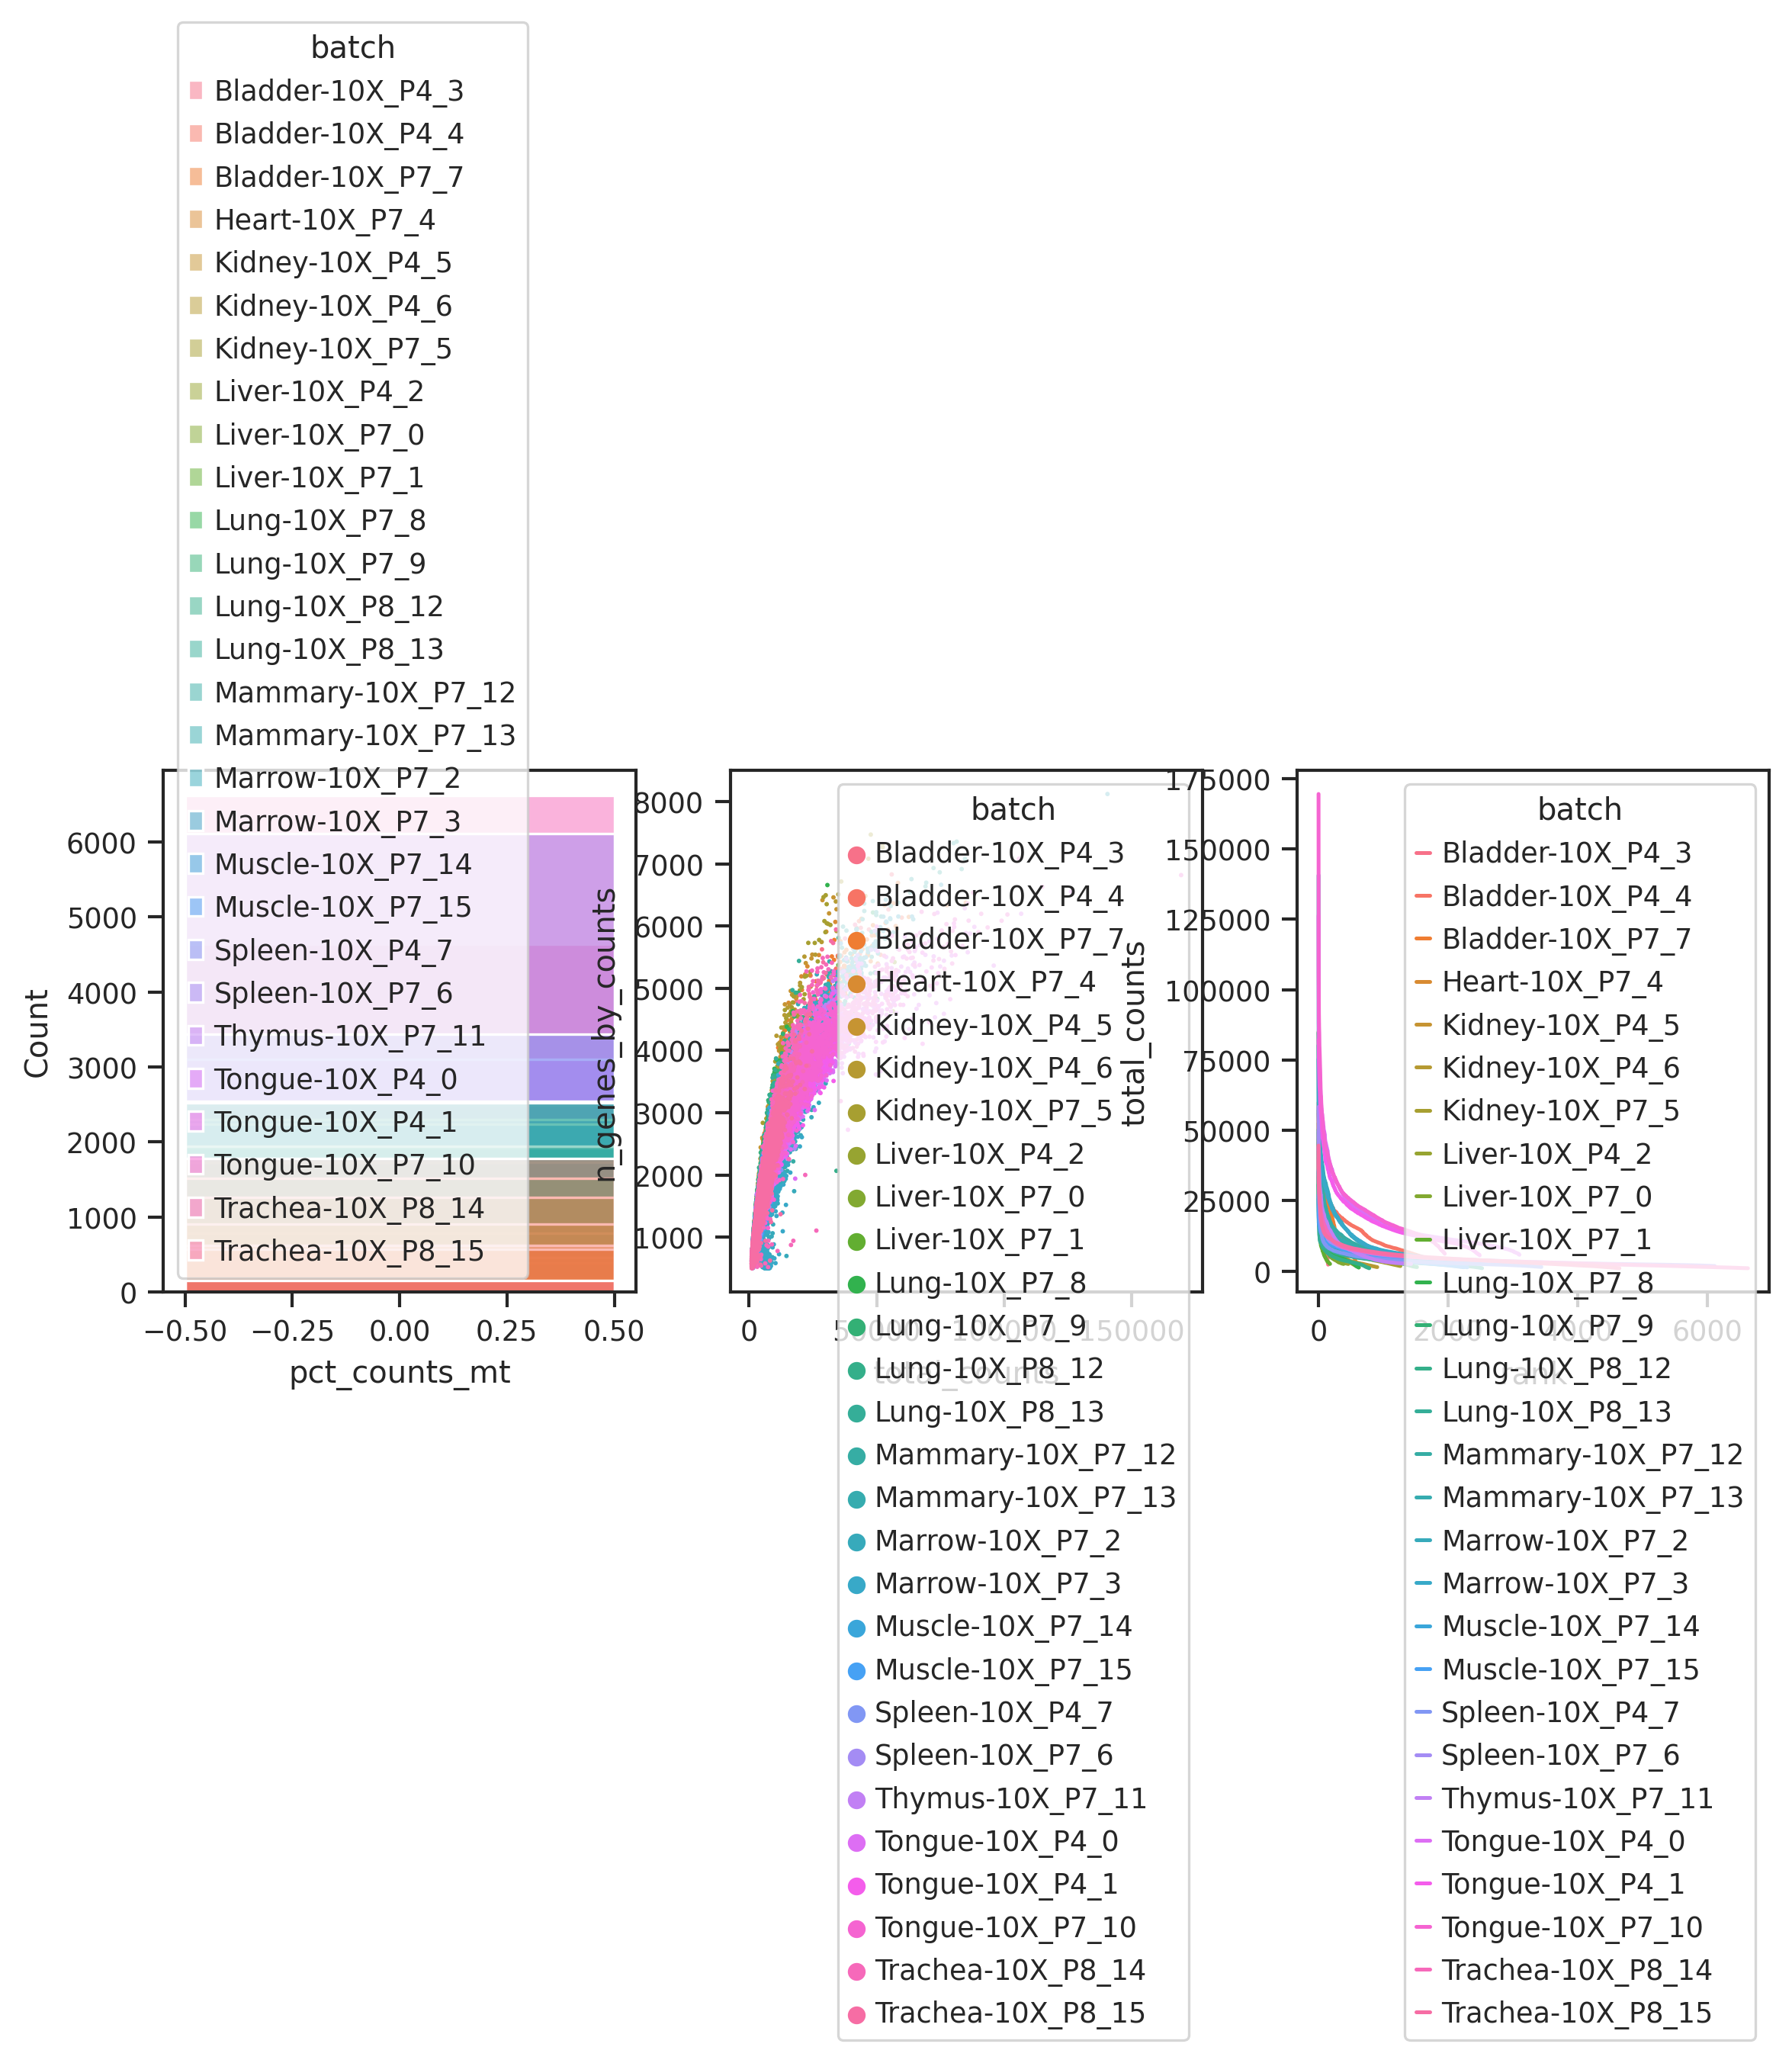

In [10]:
qc_plot(adata, show_thresh=False)

# Create pseudobulk signatures

In [11]:
def create_signature_matrix(adata, obs_key, save_path):
    signatures = pd.DataFrame(index=adata.var_names)
    for cell_type in adata.obs[obs_key].unique():
        signatures[cell_type] = list(pd.DataFrame(adata[adata.obs[obs_key] == cell_type].X.todense()).mean(axis=0))
    signatures.to_csv(save_path)
    return signatures

## Full atlas

In [16]:
signatures = create_signature_matrix(adata, "cell_ontology_class", "/notebook/Joe/M-cells/analysis/cell_type_signatures/tabula_muris_signatures.csv")

In [22]:
signatures = signatures.drop("unknown", axis=1)
signatures

,mesenchymal cell,bladder cell,endothelial cell,basal cell of urothelium,leukocyte,fibroblast,cardiac muscle cell,endocardial cell,smooth muscle cell,erythrocyte,...,Fraction A pre-pro B cell,mesenchymal stem cell,chondroblast,skeletal muscle satellite cell,basal cell of epidermis,keratinocyte,epithelial cell,neuroendocrine cell,basal cell of epithelium of trachea,ciliated epithelial cell
Xkr4,0.000830,0.000959,0.000000,0.000000,0.000000,0.001931,0.000000,0.000000,0.011020,0.000000,...,0.000000,0.000725,0.000000,0.000000,0.001087,0.000614,0.003728,0.003207,0.000000,0.000000
Rp1,0.000000,0.000000,0.000000,0.000000,0.000825,0.000000,0.049764,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.002082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.433208
Sox17,0.000475,0.001839,0.982717,0.000000,0.052291,0.020524,0.000000,0.011501,0.078793,0.007174,...,0.016530,0.032705,0.029102,0.026074,0.000000,0.000000,0.002680,0.010339,0.000000,0.000000
Mrpl15,0.197573,0.185654,0.193273,0.190909,0.146530,0.311251,0.338974,0.427502,0.350385,0.111927,...,0.933553,0.136700,0.104757,0.100069,0.431923,0.450696,0.169519,0.155978,0.268676,0.068708
Lypla1,0.170388,0.298757,0.245419,0.327175,0.163552,0.285693,0.355911,0.268577,0.270886,0.082993,...,0.568551,0.171137,0.205019,0.112644,0.448954,0.327226,0.182173,0.142375,0.089863,0.182171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERCC-00171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gfp_transgene,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cre_transgene,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tdtom_transgene,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
signatures.to_csv("/notebook/Joe/M-cells/analysis/cell_type_signatures/tabula_muris_signatures.csv")